# Семинар: Терминология. Введение в sklearn. KNN. Задачи


### Задание 1: kNN. Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names']) # в загруженной таблице лежат словари 'data', 'target', 'feature_names' и др.
# эти словари будет использовать для метода kNN
y = data['target'] # записывем словарь target в переменную в качестве массива (наша искомая величина, класс объекта)
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
X.head(8) # сами данные, на основе которых будет строить выборку

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


In [ ]:
X.shape # форма таблицы с данными

(178, 13)

**Задача 1.1**. Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [ ]:
X.isna().sum() # пропусков нет

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [ ]:
X.dropna(axis=0, inplace=False)  # код на случай того, если бы были пропуски (мы бы из удалили)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
X.info() # можно видеть, что нет типа данных "object"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [ ]:
X.describe() # вся описательная информация по нашим данным

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
X.describe(include=['object']) # ошибка, так нет данных типа "object" `No objects to concatenate` ~ `Нет объектов для объединения`

ValueError: ignored

In [ ]:
X_obj = (X.dtypes == "object")
X_obj # все числовые

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
dtype: bool

In [ ]:
X.columns[X_obj] # пустой список индексов

Index([], dtype='object')

In [ ]:
X_obj = X[X.columns[X_obj]].fillna("") # заполнение пропусков пустой строкой (если бы они у нас были)

In [ ]:
from sklearn.preprocessing import OneHotEncoder # импорт инструмента для кодирования категориальных данных

In [ ]:
# использовали бы этот код, если бы надо было кодировать категориальные данные
encoder = OneHotEncoder(drop='first') #создаем экземпляр класса
#encoder.fit_transform(X_no_mis[[17]])
X_obj_encoder = pd.DataFrame(encoder.fit_transform(X_obj[[17]]).toarray()) # поменяли бы номер столбца
X_no_mis_encoder.columns= ['17_0', '17_1', '17_2', '17_3', '17_4', '17_5', '17_6']#, '17_7'] и поменяли бы названия новые столбцов
X_no_mis_encode

KeyError: ignored

**Задача 1.2**. Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Суть параметра random_state (во всех функциях и методах из SciKit-Learn) в воспроизводимых случайных значениях. Т.е. если явно задать значение random_state отличным от None - то генерируемые псевдослучайные величины будут иметь одни и те же значения при каждом вызове.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # разбиваем данные на основную (train)
# и тестовую (test) выборки. Размер тестовой - test_size=0.3, по усл., обязательно утсанавливаем random_state=42

print(f"Классы в y_train:\n{y_train}") # смотрим на то, что классы в y разбились равномерно
print(f"Классы в y_test:\n{y_test}")
print(f"Размер основной выборки: {len(y_train)/len(y)}\n", f"Размер тестовой выборки: {len(y_test)/len(y)}") # проверяем


Классы в y_train:
[0 0 0 0 1 0 2 1 2 0 1 1 2 1 0 0 0 1 1 0 1 1 1 1 1 2 1 0 2 1 2 2 0 2 1 1 1
 1 2 0 0 0 0 0 0 1 1 2 0 2 0 0 0 2 0 2 1 1 1 0 1 0 1 1 0 2 1 0 0 1 1 2 0 0
 2 1 1 1 2 2 2 2 1 1 0 0 1 1 1 2 2 1 1 2 0 0 0 2 1 2 1 1 2 0 1 1 0 1 2 1 2
 0 2 0 0 1 1 2 0 2 1 2 2 1]
Классы в y_test:
[0 1 0 0 0 0 2 1 1 2 1 1 2 1 0 2 1 0 2 2 1 2 2 2 1 2 0 1 0 1 0 1 2 1 1 2 1
 1 1 0 2 0 0 0 0 1 1 0 2 0 1 1 2 0]
Размер основной выборки: 0.6966292134831461
 Размер тестовой выборки: 0.30337078651685395


**Задача 1.3**. На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
X_train[["alcohol", "magnesium"]].head() # выбираем нужные столбцы в x_train

,alcohol,magnesium
12,13.75,89.0
30,13.73,101.0
36,13.28,110.0
31,13.58,106.0
120,11.45,96.0


In [ ]:
X_test[["alcohol", "magnesium"]].head() # выбираем нужные столбцы в x_test

,alcohol,magnesium
2,13.16,101.0
64,12.17,104.0
18,14.19,108.0
7,14.06,121.0
38,13.07,98.0


In [ ]:
from sklearn.preprocessing import StandardScaler # инструмент для нормализации значений
# ?StandardScaler
from sklearn.neighbors import KNeighborsClassifier # метод kNN

In [ ]:
#масштабируем

scaler = StandardScaler() #создаем стандартный scaler
scaler.fit(X_train[["alcohol", "magnesium"]])
scaled_X_train = scaler.transform(X_train[["alcohol", "magnesium"]]) # получаем преобразованные, нормализованные данные
scaled_X_test = scaler.transform(X_test[["alcohol", "magnesium"]])

In [ ]:
# print(scaled_X_train.shape, y_train.reshape(124, 1).shape)
# print(scaled_X_test.shape, y_test.reshape(54, 1).shape)

In [ ]:
# x_train_concat = np.concatenate((scaled_X_train, y_train.reshape(124, 1)), axis=1) # объединяем таблички
# x_test_concat = np.concatenate((scaled_X_test, y_test.reshape(54, 1)), axis=1)
# print(f'X_train shape: {x_train_concat.shape},\n'
#       f'X_test shape: {x_test_concat.shape}')
# x_test_concat
scaled_X_train

array([[ 9.82686362e-01, -7.27661028e-01],
       [ 9.57937076e-01,  6.32517621e-02],
       [ 4.01078145e-01,  6.56436355e-01],
       [ 7.72317432e-01,  3.92798758e-01],
       [-1.86348151e+00, -2.66295234e-01],
       [ 2.31914780e+00, -2.00385835e-01],
       [-1.06282215e-01, -9.25389225e-01],
       [-6.50766504e-01, -9.25389225e-01],
       [-3.20343579e-02, -2.66295234e-01],
       [ 1.44054815e+00, -3.32204633e-01],
       [-7.74512933e-01,  2.37008073e+00],
       [-3.16651145e-01,  6.32517621e-02],
       [-7.37389005e-01, -7.93570427e-01],
       [-1.41799437e+00,  2.23826193e+00],
       [ 1.00743565e+00,  9.85983350e-01],
       [ 2.22015065e+00, -5.95842230e-01],
       [ 1.16461357e-01,  1.57916794e+00],
       [-6.01267933e-01,  4.08372511e+00],
       [-4.40397574e-01, -7.93570427e-01],
       [ 1.16461357e-01, -5.29932830e-01],
       [ 1.11880743e+00, -9.25389225e-01],
       [-1.08387901e+00, -1.25493622e+00],
       [-1.40561972e+00, -9.25389225e-01],
       [-1.

In [ ]:
clf_list = [] # список классификаторов
data_score = [] # список, который я использую для записаи в таблицу
for n_neighbors in [1, 3, 5, 10, 15, 25]: # кол-во нужных по усл. соседей
  data_score.append(n_neighbors) # заполняю табличку
  clf = KNeighborsClassifier(n_neighbors = n_neighbors, p=1)#, n_jobs=10)  создаем наши классификаторы, кол-во соседей меняется
  # согласно списку n_neighbors, параметор p=1 отвечает за то, что мы используем евклидово расстояние
  clf.fit(scaled_X_train, y_train)
  clf_list.append(clf.fit(scaled_X_train, y_train)) # наполняем наш список классификаторов
  y_predicted_test = clf.predict(scaled_X_test) # получаем массив предсказаний для тестовой выборки
  y_predicted_train = clf.predict(scaled_X_train) # получаем массив предсказаний для основной выборки

  train = np.mean(y_predicted_train == y_train) # доля правильныз ответов для основной выборки
  data_score.append(train) # заполняю табличку

  test = np.mean(y_predicted_test == y_test) # доля прав ответов для тестовой выборки
  data_score.append(test) # заполняю табличку


# дальше все действия для того, чтобы табличка нормально выглялела :)

df = pd.DataFrame(np.array(data_score ).reshape(6, 3))
df = df.rename(columns={0: "NN", 1 :"Train", 2 : "Test"})
df["NN"] = df["NN"].astype(int)
df

,NN,Train,Test
0,1,1.000000,0.574074
1,3,0.806452,0.666667
2,5,0.806452,0.611111
3,10,0.758065,0.703704
4,15,0.741935,0.685185
5,25,0.709677,0.722222


In [ ]:
scaled_X_train

array([[ 6.28447319e-01, -8.41476602e-01],
       [-5.40882312e-01, -1.03748743e+00],
       [-7.55657142e-01,  2.29469668e+00],
       [ 3.77876684e-01,  5.95936153e-01],
       [-8.03384882e-01, -8.41476602e-01],
       [ 8.90949889e-01,  7.90366251e-03],
       [ 1.09379278e+00, -1.36417215e+00],
       [-8.03384882e-01, -1.03748743e+00],
       [-8.98840362e-01,  3.27475083e+00],
       [-1.70992327e-01, -8.41476602e-01],
       [ 1.38015922e+00, -3.84117998e-01],
       [ 1.70232147e+00, -3.18781055e-01],
       [ 4.01740554e-01, -4.49454941e-01],
       [-8.51112622e-01,  7.26610040e-01],
       [ 3.30148944e-01,  1.11863170e+00],
       [ 8.55154084e-01,  2.03914493e-01],
       [-5.88610052e-01,  3.99345721e+00],
       [-9.10772297e-01, -3.18781055e-01],
       [-1.55509679e+00, -2.53444111e-01],
       [ 1.35629535e+00,  2.69251436e-01],
       [-1.11332652e-01, -9.72150489e-01],
       [ 1.03442178e-01, -9.72150489e-01],
       [ 1.51141051e+00,  1.70666419e+00],
       [ 6.

In [ ]:
 ################################## Пример (не запускать)

### ПРИМЕР ВЫВОДА ###
NN 	 Train 	 Test
1 	 1.0 	 0.56
3 	 0.83 	 0.61
5 	 0.81 	 0.63
10 	 0.79 	 0.54
15 	 0.74 	 0.57
25 	 0.76 	 0.56


**Задача 1.4**. Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5**. Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision region grids). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

In [ ]:
# from sklearn.linear_model import LogisticRegression # это нам не нужно, это регрессия
# from sklearn.naive_bayes import GaussianNB # это нам тоже не нужно, это еще какой-то метод машинного обучения
# from sklearn.ensemble import RandomForestClassifier # это нам тоже не нужно, это еще какой-то метод машинного обучения
# from sklearn.svm import SVC # это нам тоже не нужно, это еще какой-то метод машинного обучения
# from sklearn import datasets # это нам тоже не нужно, это еще какой-то метод машинного обучения


# # # Initializing Classifiers
# # clf1 = LogisticRegression(random_state=1,
# #                           solver='newton-cg',
# #                           multi_class='multinomial')
# # clf2 = RandomForestClassifier(random_state=1, n_estimators=100)
# # clf3 = GaussianNB()
# # clf4 = SVC(gamma='auto')

# # # Loading some example data
# # iris = datasets.load_iris()
# # X = iris.data[:, [0,2]]
# # y = iris.target

In [ ]:
import itertools

In [ ]:
list(itertools.product([0, 1, 2], repeat=2))

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

In [ ]:
print(scaled_X_train.shape)
print(y_train.shape) # массив

(124, 2)
(124,)


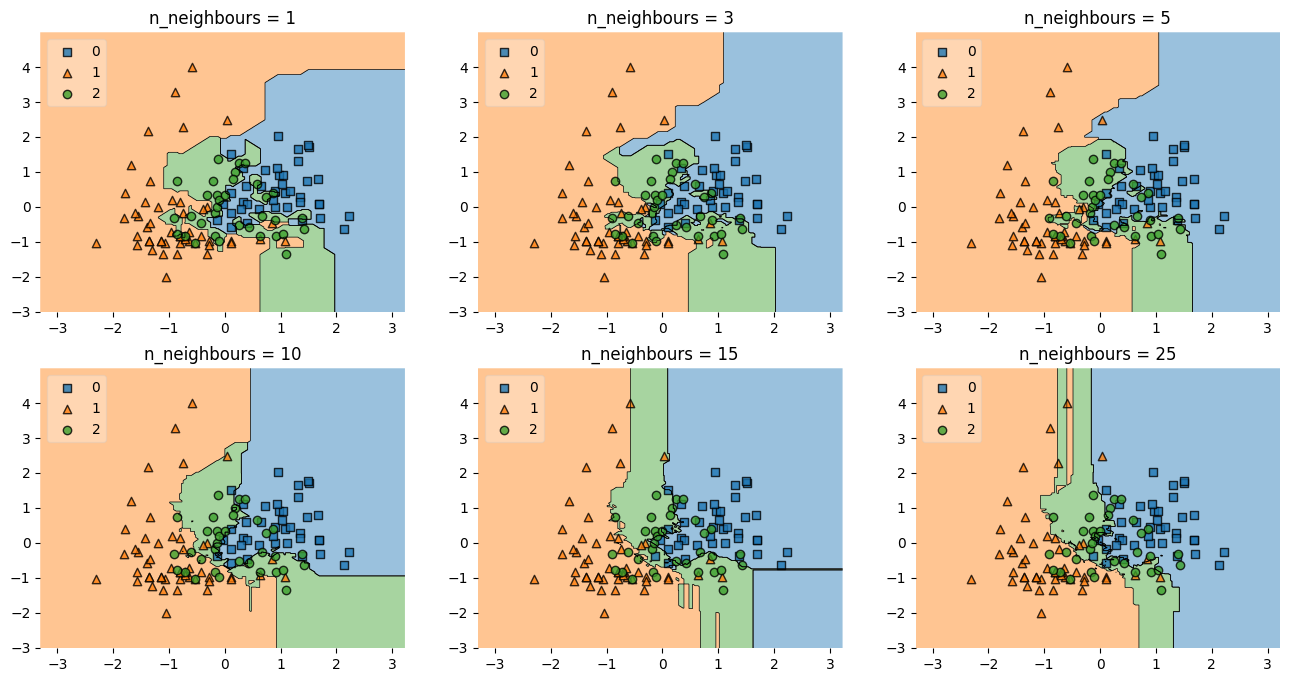

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3) # этот параметр  отвечает за расположение графиков (2 строки, 3 столбца)

fig = plt.figure(figsize=(14,8))
# clf_v = []
# for n_neighbors in [1, 3, 5, 10, 15, 25]:
#   clf = KNeighborsClassifier(n_neighbors = n_neighbors, p=1)
#   clf = clf.fit(scaled_X_train, y_train)
#   clf_v.append(clf)
  # clf_v.append(KNeighborsClassifier(n_neighbors = n_neighbors, p=1).fit(scaled_X_train, y_train))

labels = ['n_neighbours = 1', 'n_neighbours = 3', 'n_neighbours = 5', 'n_neighbours = 10', 'n_neighbours = 15', 'n_neighbours = 25']
 # список названий графиков
for clf, lab, grd in zip(clf_list, # берем нужные значения из спсика с нашими классификаторами, которые мы создали в задании 3,
                         labels, #  еще берем названия графиков, которые мы писали выше
                         itertools.product([0, 1, 2], repeat=2)): # и перестановки
    # clf.fit(scaled_X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]]) # сторим наши графики
    fig = plot_decision_regions(X=scaled_X_train, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show() # строятся у меня они 10 минут :(

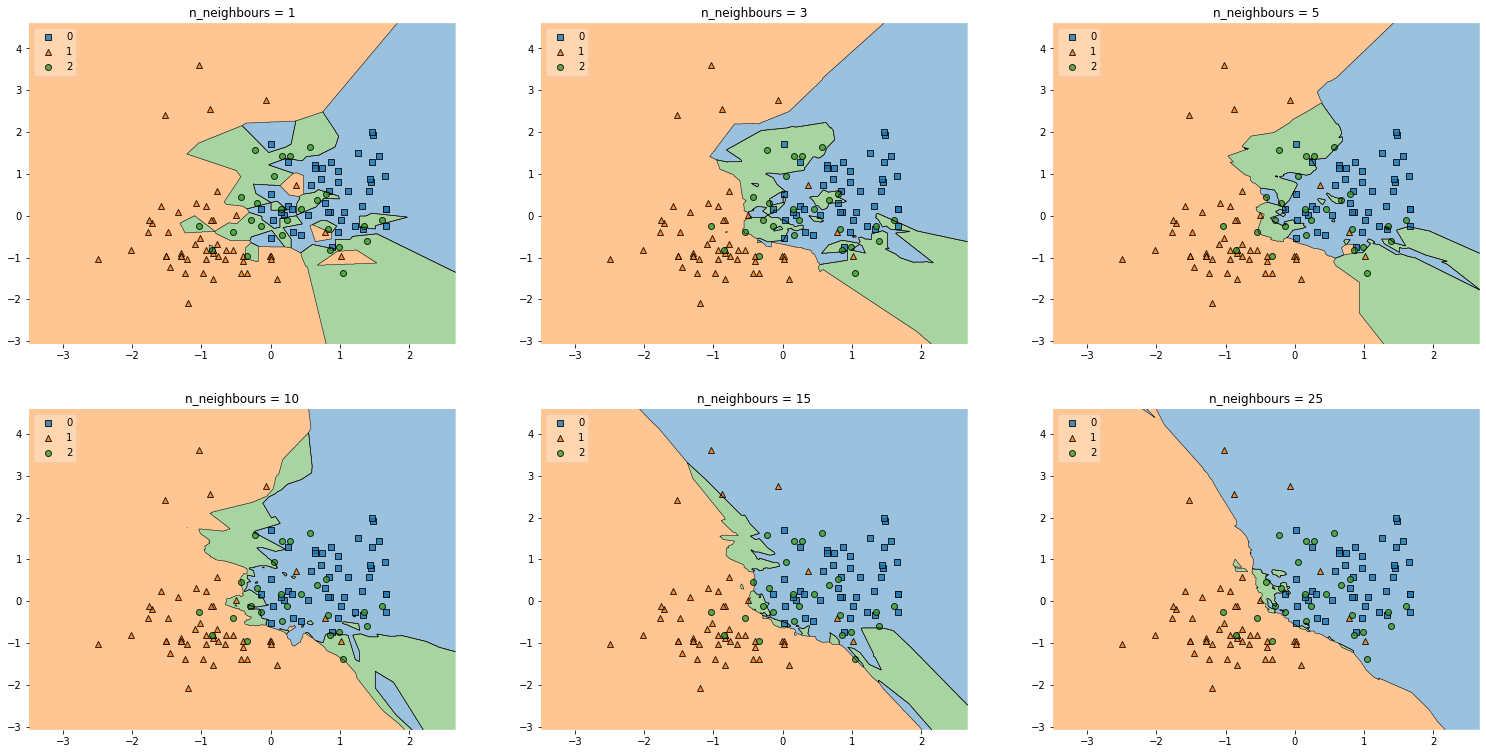

In [ ]:
################################## Пример (не запускать)

**Задача 1.6** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Можем видеть, что на тестовой выборке изначально не очень высокий результат (не выше 0.7). Далее когда мы увечиливаем кол-во соседей до 15, точность на тестовой выборке растет.

С основной выборкой все немного по-другому: изначально результат очень близок к 1, а потмо он постепенно уменьшается при увеличении кол-ва соседей.

Если мы буде рассматривать одного соседа, то эта выборка не принесет нам никакой полезной информации, так как мы будем рассматривать тот же объект.

Исходя из 5 задания, я бы выбрала 10 или 15 соседей. Потому что в этих вариантах вырисывываются отдельные непрерывные участки, в которых расположеные объекты одного класса (конечно же встречаются и объекты ругих классов, чтобы из минимизировать можно взять еще меньше соседей)

### Задание 2. KNN своими руками (дополнительно).

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

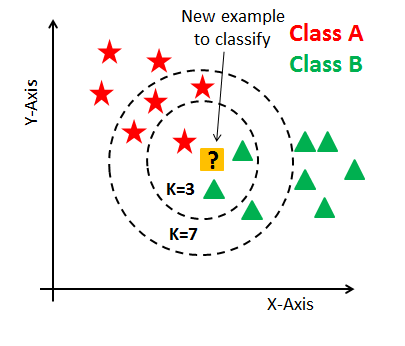

In [ ]:
import numpy as np
from collections import Counter  #не пригодилось, посмотреть с Counter

Функция fit будет использоваться для обучения модели на обучающей выборке. Она должна принимать на вход два аргумента: матрицу признаков X и вектор меток y. Матрица X должна иметь размерность (n_samples, n_features), где n_samples - количество объектов в обучающей выборке, а n_features - количество признаков. Вектор y должен иметь размерность (n_samples,), где n_samples - количество объектов в обучающей выборке. Функция fit должна сохранять обучающую выборку внутри модели.

Функция predict будет использоваться для предсказания меток классов на тестовой выборке. Она должна принимать на вход матрицу признаков X и возвращать вектор меток классов y_pred. Матрица X должна иметь размерность (n_samples, n_features), где n_samples - количество объектов в тестовой выборке, а n_features - количество признаков. Вектор y_pred должен иметь размерность (n_samples,), где n_samples - количество объектов в тестовой выборке.

In [ ]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int): # инициализируем созданный объект
        self.k = k # k - кол-во соседей

    def fit(self, X, y): # на вход подаем массив с данными и столбец (массив) с данными, которые будем предсказывать
      self.X_train = X  # в перемнную Х записываем выборку основных данных
      self.y_train = y # в перемнную Y записываем выборку основных данных, которые будем предсказывать (target)

    def predict(self, X): # на вход подаем массив данных
      y_pred = [] # в этот список будт записывать предсказания
      for x_test in X: # проебгаемся по всем элементам массива Х
          distances = np.sqrt(np.sum((self.X_train - x_test)**2, axis=1)) # вычисляем евклидово расстояние между основной и тестовой выборкой
          k_nearest = np.argsort(distances)[:self.k]
           # выбираем заданное число ближ. соседей (в квадроатных скобках указываем, что берем значения до k)
          k_nearest_labels = self.y_train[k_nearest]
          y_pred.append(np.bincount(k_nearest_labels).argmax())
          # функция bincount для подсчета количества голосов за каждый класс, функция argmax для выбора класса с наибольшим количеством голосов.
      return np.array(y_pred) # на выходе предсказание для выборки


In [ ]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)